提前导入相关库

In [10]:
import os
import sys
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO

随机生成训练集和测试集，其中70%的数据作为训练集，30%的数据作为测试集。先研究连续变量。从散点图来看，Limit和Rating与Balance之间存在明显的线性关系，Income与Balance存在较弱的线性关系，另外，Cards和Education对Balance也有一定的影响。先对存在明显线性关系的Limit和Rating进行分析。

In [11]:
# 读取数据并划分测试集，训练集
data=pd.read_csv(FilesIO.getHomeworkData('Credit.csv'))
X=data[['Limit','Rating']].values
y=data['Balance'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

针对Limit和Rating这两种特征，进行线性回归

In [12]:
# 进行线性回归
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print('截距项theta0为：%.3f'% linreg.intercept_)
for i in range(len(linreg.coef_)):
    print('回归系数theta'+str(i+1)+'为：',linreg.coef_[i])


截距项theta0为：-404.709
回归系数theta1为： 0.0002428385305146186
回归系数theta2为： 2.5930314860551285


根据以上结果可知，
截距项theta0为-404.709，说明当Limit和Rating都为0时，Balance的预期输出值为-404.709.
theta1=0.000243，说明当Limit每增加1个单位，Balance的预期输出值将会增加0.000243.
theta2=2.593，说明当Rating每增加一个单位，Balance的预期输出值将会增加2.593.

在测试集上预测 balance。画出预测值和测试集上真实 balance 的对比图

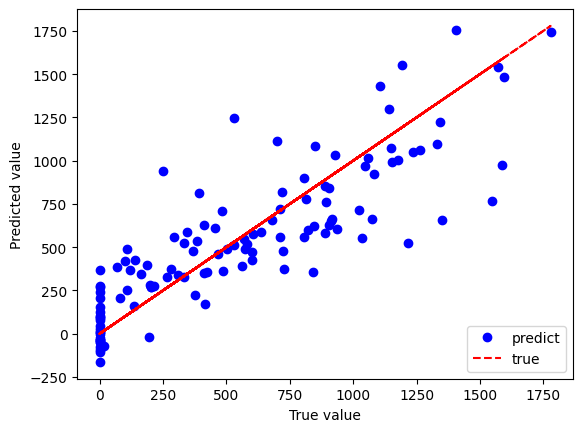

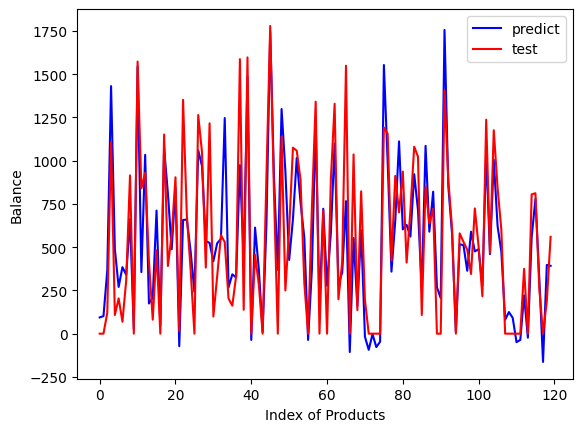

In [13]:
y_pred = linreg.predict(X_test)
# 画出测试值在测试集上的对比图
plt.figure()
plt.plot(y_test,y_pred, 'bo',label="predict") ## bo: 蓝色的圈
plt.plot(y_test,y_test, 'r--',label="true") ## r--: 红色虚线
plt.legend(loc="lower right") #显示图中的标签
plt.xlabel("True value")
plt.ylabel('Predicted value')
plt.show()

plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b',label="predict") ## 预测值用蓝色线表示
plt.plot(range(len(y_pred)), y_test, 'r',label="test") ## 真实值用红色线表示
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("Index of Products")
plt.ylabel('Balance')
plt.show()


计算在测试集上的均方误差（MSE）,可决系数R2。

In [14]:
# 结果分析
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
R2 = linreg.score(X_test, y_test)
print('均方误差为: %.3f' % MSE)
print('均方根误差为: %.3f' % RMSE)
print('R2值为: %.3f' % R2)

均方误差为: 60713.790
均方根误差为: 246.402
R2值为: 0.727


根据以上结果，回归的R2值为0.727，回归效果较好。但是从上面的对比图以及均方误差的大小来看，回归模型仍然具有相当的改进空间。因此，我们重新选择特征变量。继续观察之前所作的探索性分析可以发现，分类变量Gender与Students对Balance的影响较大。其他连续变量Income，Education，Cards对Balance也存在一定的影响。因此将这部分特征纳入回归模型中重新划分训练集和测试集，仍然以70%的数据作为训练集，30%的数据作为测试集。

In [15]:
# 读取数据并划分测试集，训练集
data=pd.read_csv(FilesIO.getHomeworkData('Credit.csv'))
X=data[['Limit','Rating','Income','Cards','Education','Gender','Student']]
X=pd.get_dummies(X,drop_first=True)
y=data['Balance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)
X.head()

,Limit,Rating,Income,Cards,Education,Gender_Female,Student_Yes
0,3606,283,14.891,2,11,0,0
1,6645,483,106.025,3,15,1,1
2,7075,514,104.593,4,11,0,0
3,9504,681,148.924,3,11,1,0
4,4897,357,55.882,2,16,0,0


对以上特征进行线性回归

In [16]:
# 进行线性回归
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print('截距项theta0为：%.3f'% linreg.intercept_)
for i in range(len(linreg.coef_)):
    print('回归系数theta'+str(i+1)+'为：%.3f'% linreg.coef_[i])

截距项theta0为：-494.079
回归系数theta1为：0.185
回归系数theta2为：1.227
回归系数theta3为：-7.808
回归系数theta4为：16.587
回归系数theta5为：-2.300
回归系数theta6为：-7.816
回归系数theta7为：417.970


根据以上结果，
截距项theta0为-526.582，说明当所有特征均为0时，Balance的预期输出值为-526.582。
theta1=0.142，说明Limit每增加一个单位，Balance的预期输出值将会增加0.142。
theta2=1.862，说明Rating每增加一个单位，Balance的预期输出值将会增加1.862。
theta3=-7.871，说明Income每增加一个单位，Balance的预期输出值将会减少7.871。
theta4=12.007，说明Cards每增加一个单位，Balance的预期输出值将会增加12.007。
theta5=-0.740，说明Education每增加一个单位，Balance的预期输出值将会减少0.740。
theta6=-1.385，说明性别为男性时，Balance的预期输出值比性别为女性时将会增加1.385。
theta7=430.998，说明个体是学生时，Balance的预期输出值比个体不是学生时将会增加430.998。

在测试集上预测 balance。画出预测值和测试集上真实 balance 的对比图

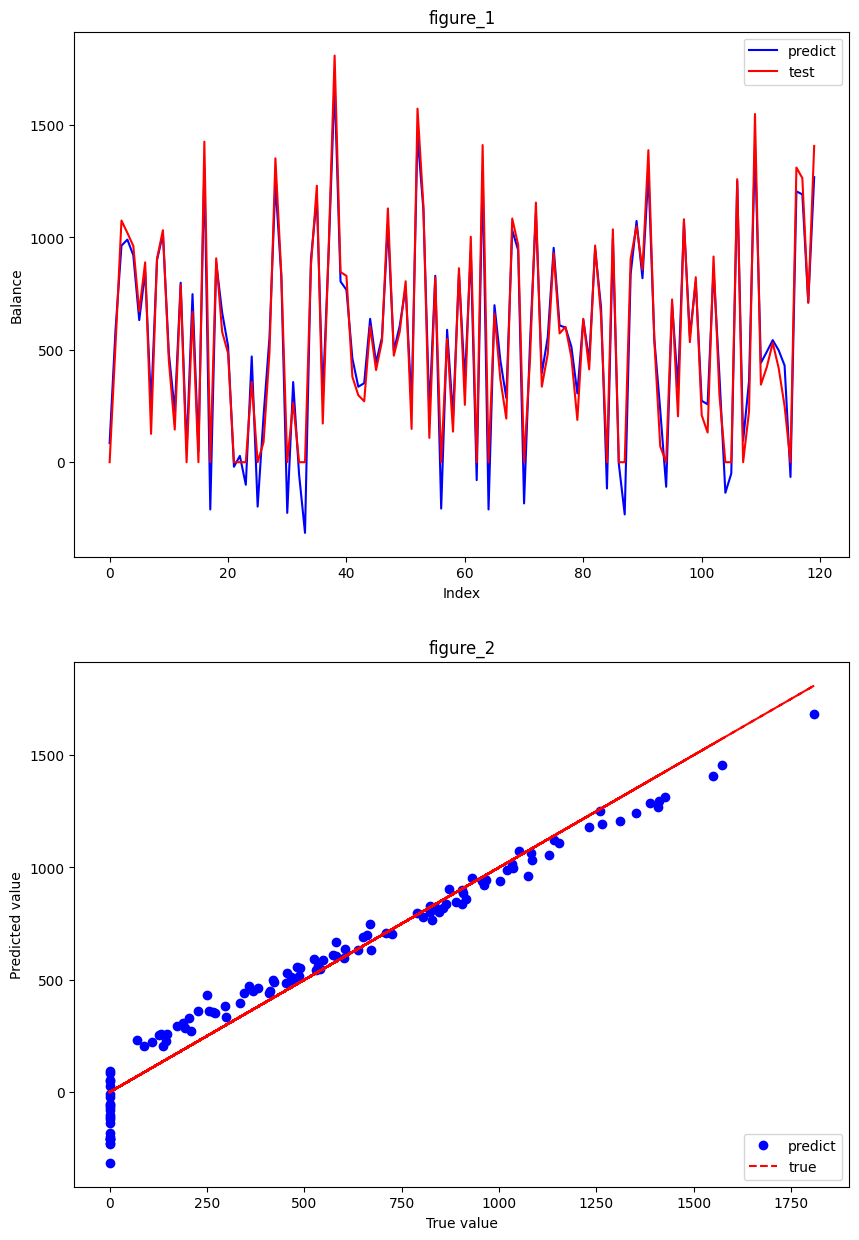

In [17]:
y_pred = linreg.predict(X_test)
# 画出测试值在测试集上的对比图
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
plt.title('figure_1')
plt.xlabel("Index")
plt.ylabel('Balance')
plt.plot(range(len(y_pred)), y_pred, 'b',label="predict") ## 预测值用蓝色线表示
plt.plot(range(len(y_pred)), y_test, 'r',label="test") ## 真实值用红色线表示
plt.legend(loc="upper right") #显示图中的标签

plt.subplot(2,1,2)
plt.title('figure_2')
plt.xlabel("True value")
plt.ylabel('Predicted value')
plt.plot(y_test,y_pred, 'bo',label="predict") ## bo: 蓝色的圈
plt.plot(y_test,y_test, 'r--',label="true") ## r--: 红色虚线
plt.legend(loc="lower right") #显示图中的标签
plt.show()


计算在测试集上的均方误差（MSE）,可决系数R2。

In [18]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
R2 = linreg.score(X_test, y_test)
print('均方误差为: %.3f' % MSE)
print('均方根误差为: %.3f' % RMSE)
print('R2值为: %.3f' % R2)

均方误差为: 8705.011
均方根误差为: 93.301
R2值为: 0.958


综上所述，将Limit,Rating,Income,Cards,Education,Gender,Student作为特征变量放入线性回归的模型中。此时模型的R2值为0.951，拟合效果相当好，均方误差相较于之前大幅下降，预测效果很好。从线性回归模型来看，性别为男性，是学生的个体，其Limit，Rating，Cards越高，Balance越高。